Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Best Parameters from GridSearchCV:
{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
\n📈 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123

✅ Accuracy: 82.93%


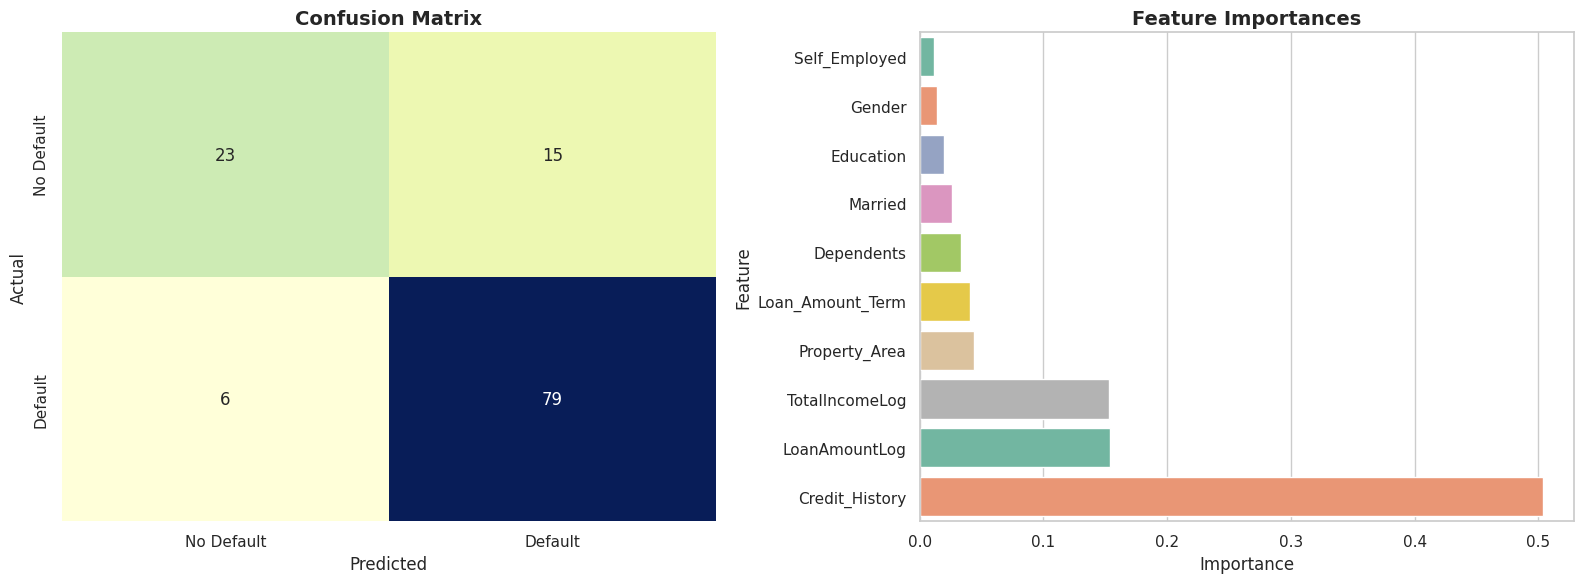

In [9]:
# 📊 Loan Default Prediction with Random Forest

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")

# Step 2: Load Data
df = pd.read_csv("/content/train_dataset.csv")

# Step 3: Data Cleaning + Feature Engineering
# Fill categorical missing values
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# New features
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmountLog'] = np.log1p(df['LoanAmount'])
df['TotalIncomeLog'] = np.log1p(df['TotalIncome'])

# Encode categories
encode_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in encode_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Feature Selection
features = ['Credit_History', 'LoanAmountLog', 'TotalIncomeLog', 'Loan_Amount_Term',
            'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
X = df[features]
y = df['Loan_Status']

# Step 5: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 6: Model Training with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Step 7: Evaluation
y_pred = best_rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Step 8: Report
print("🔍 Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("\\n📈 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Step 9: Feature Importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

# Step 10: Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0], cbar=False)
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(['No Default', 'Default'])
axes[0].set_yticklabels(['No Default', 'Default'])

# Feature Importance

# Use a color palette for variety — you can try 'husl', 'Set2', 'viridis', etc.
importances_df["ColorGroup"] = importances_df["Feature"]  # Create a dummy hue

sns.barplot(
    x='Importance',
    y='Feature',
    hue='ColorGroup',         # Use 'Feature' as hue
    dodge=False,              # Prevent split bars
    data=importances_df,
    ax=axes[1],
    palette='Set2',
    legend=False              # Avoid legend since it duplicates y-axis
)


axes[1].set_title("Feature Importances", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Importance", fontsize=12)
axes[1].set_ylabel("Feature", fontsize=12)

plt.tight_layout()
plt.show()
